<a href="https://colab.research.google.com/github/rhs329/boostcourse-3-/blob/main/3_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df=pd.read_csv("/content/diabetes.csv")
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#나이

In [ ]:
# One=Hot-Encoding
df["Age_low"] = df["Age"] < 25
df["Age_middle"] = (df["Age"] >= 25) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_low', ylabel='count'>

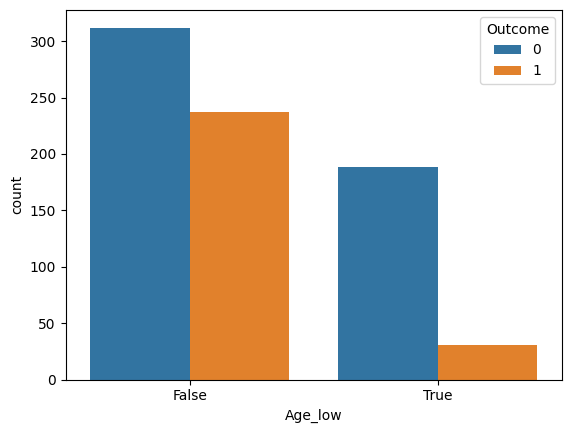

In [ ]:
sns.countplot(data=df, x = "Age_low", hue = "Outcome")

In [ ]:
# 결측치 다루기

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0
Age_low,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin", "Insulin_nan"]].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [ ]:
df["Insulin_nan"].isnull().sum()

np.int64(374)

In [ ]:
df["Insulin_nan"].isnull().mean()

np.float64(0.4869791666666667)

In [ ]:
df.groupby(["Outcome"])[["Insulin", "Insulin_nan"]].agg(["mean", "median"])

Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [ ]:
#결측치 세우기
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 130
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 206

In [ ]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [ ]:
train = df[:split_count].copy()
train.shape

(614, 13)

In [ ]:
test = df[split_count:].copy()
test.shape

(154, 13)

In [ ]:
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Insulin_nan']

In [ ]:
label_name = "Outcome"
label_name

'Outcome'

In [ ]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 7)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Insulin_nan
0,148,72,35,33.6,0.627,50,206.0
1,85,66,29,26.6,0.351,31,130.0
2,183,64,0,23.3,0.672,32,206.0
3,89,66,23,28.1,0.167,21,94.0
4,137,40,35,43.1,2.288,33,168.0


In [ ]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 7)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Insulin_nan
614,138,74,26,36.1,0.557,50,144.0
615,106,72,0,25.8,0.207,27,130.0
616,117,96,0,28.7,0.157,30,130.0
617,68,62,13,20.1,0.257,23,15.0
618,112,82,24,28.2,1.282,50,206.0


In [ ]:
y_test = test[label_name]

print(y_test.shape)
y_test.head()

(154,)


,Outcome
614,1
615,0
616,0
617,0
618,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

[Text(0.5378205128205128, 0.9666666666666667, 'Insulin_nan <= 143.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.30512820512820515, 0.9, 'BMI <= 50.0\ngini = 0.163\nsamples = 380\nvalue = [346, 34]'),
 Text(0.421474358974359, 0.9333333333333333, 'True  '),
 Text(0.2846153846153846, 0.8333333333333334, 'Glucose <= 124.5\ngini = 0.147\nsamples = 376\nvalue = [346, 30]'),
 Text(0.15897435897435896, 0.7666666666666667, 'Insulin_nan <= 129.5\ngini = 0.073\nsamples = 290\nvalue = [279, 11]'),
 Text(0.13846153846153847, 0.7, 'Insulin_nan <= 127.5\ngini = 0.148\nsamples = 137\nvalue = [126, 11]'),
 Text(0.11794871794871795, 0.6333333333333333, 'Glucose <= 99.5\ngini = 0.136\nsamples = 136\nvalue = [126, 10]'),
 Text(0.06153846153846154, 0.5666666666666667, 'DiabetesPedigreeFunction <= 0.248\ngini = 0.047\nsamples = 83\nvalue = [81, 2]'),
 Text(0.041025641025641026, 0.5, 'DiabetesPedigreeFunction <= 0.241\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(0.020512820512820513,

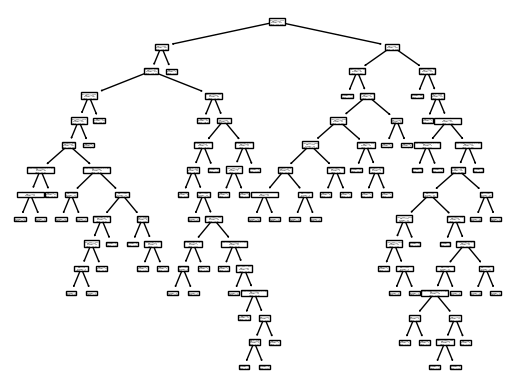

In [ ]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=feature_names)

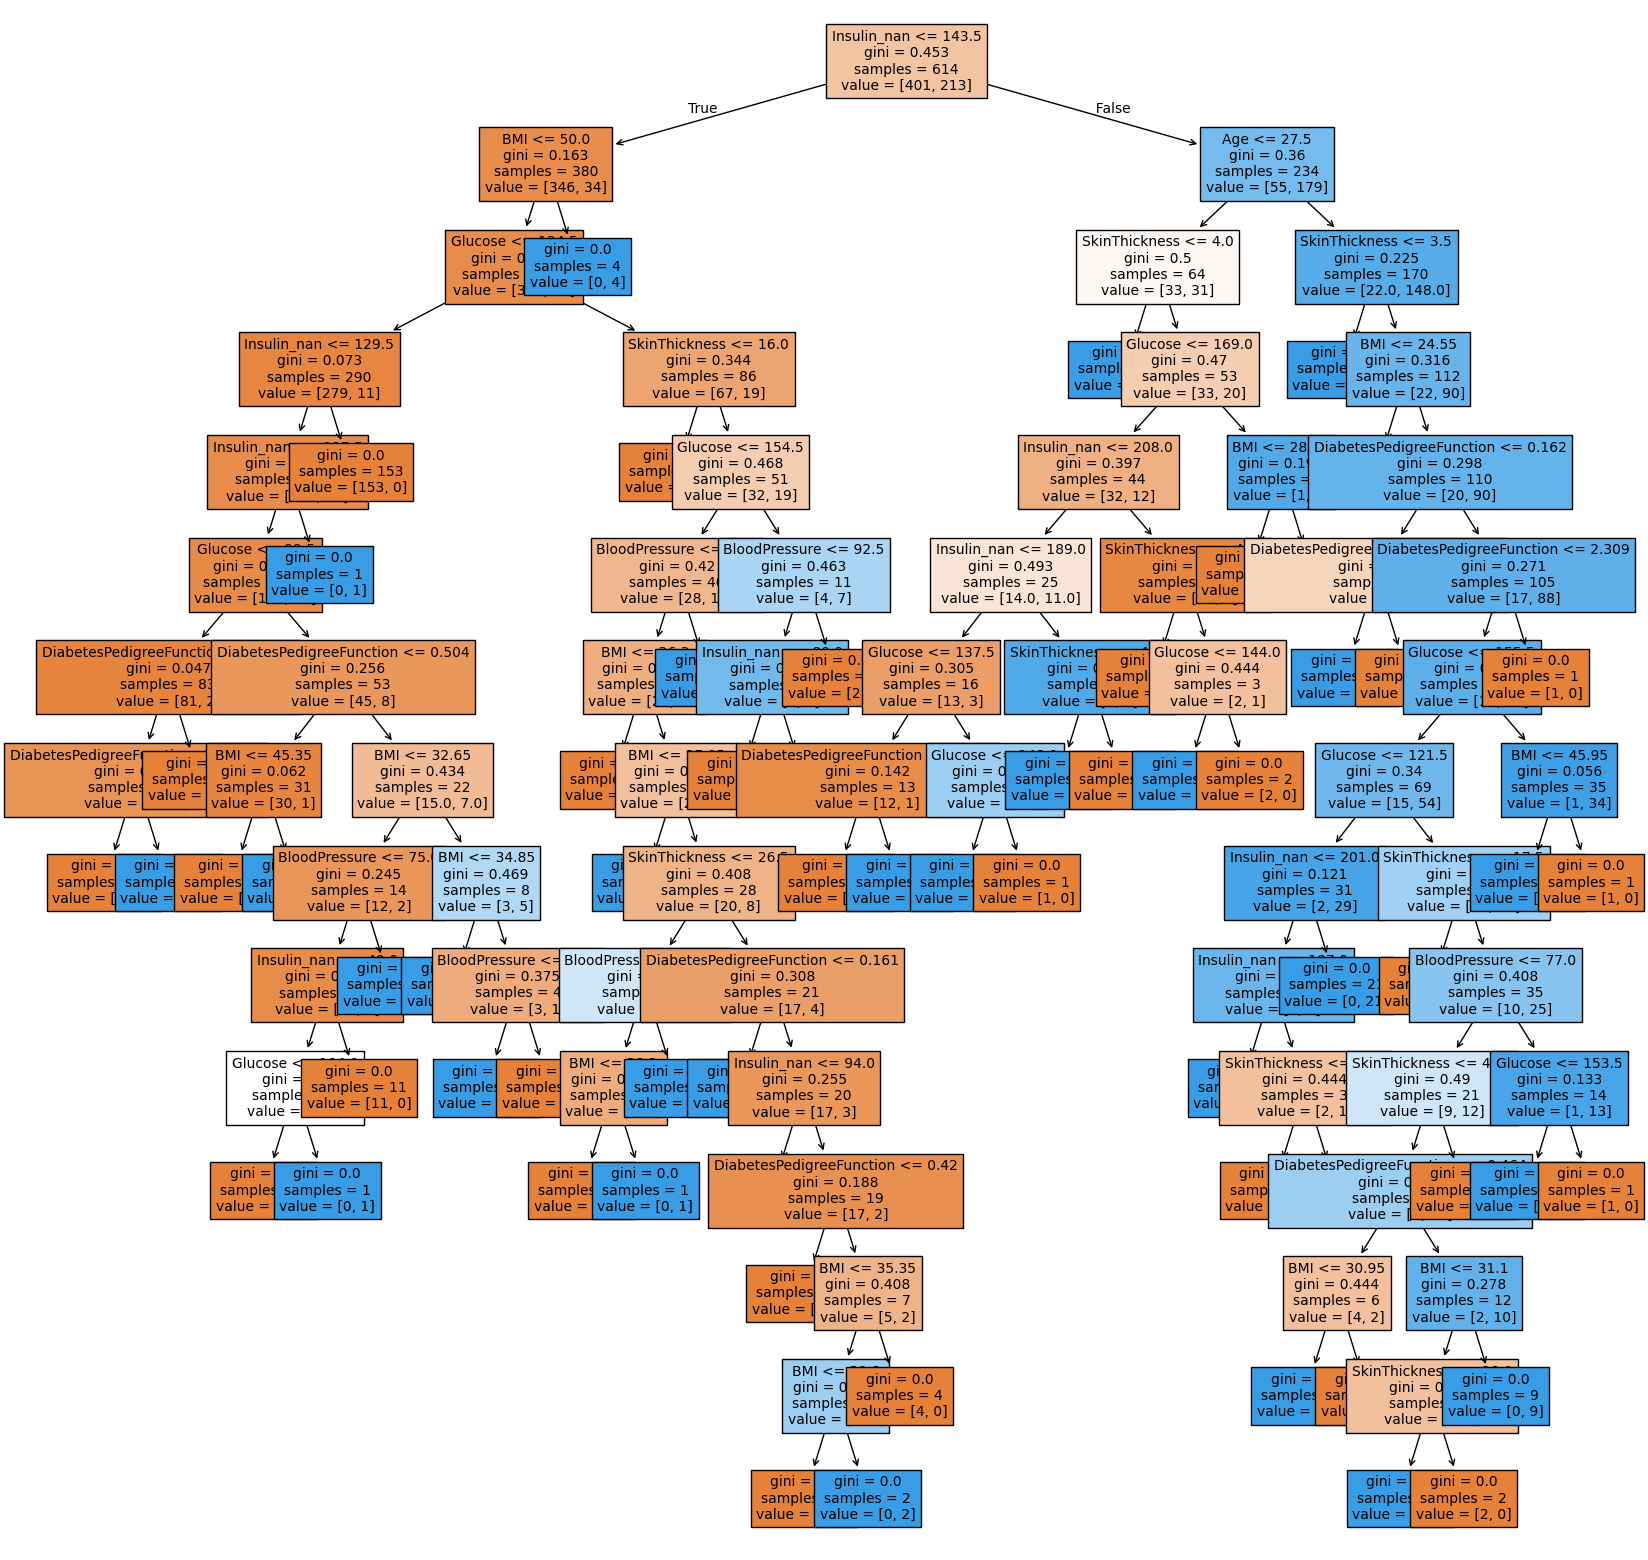

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names,
                         filled=True,
                         fontsize=10)

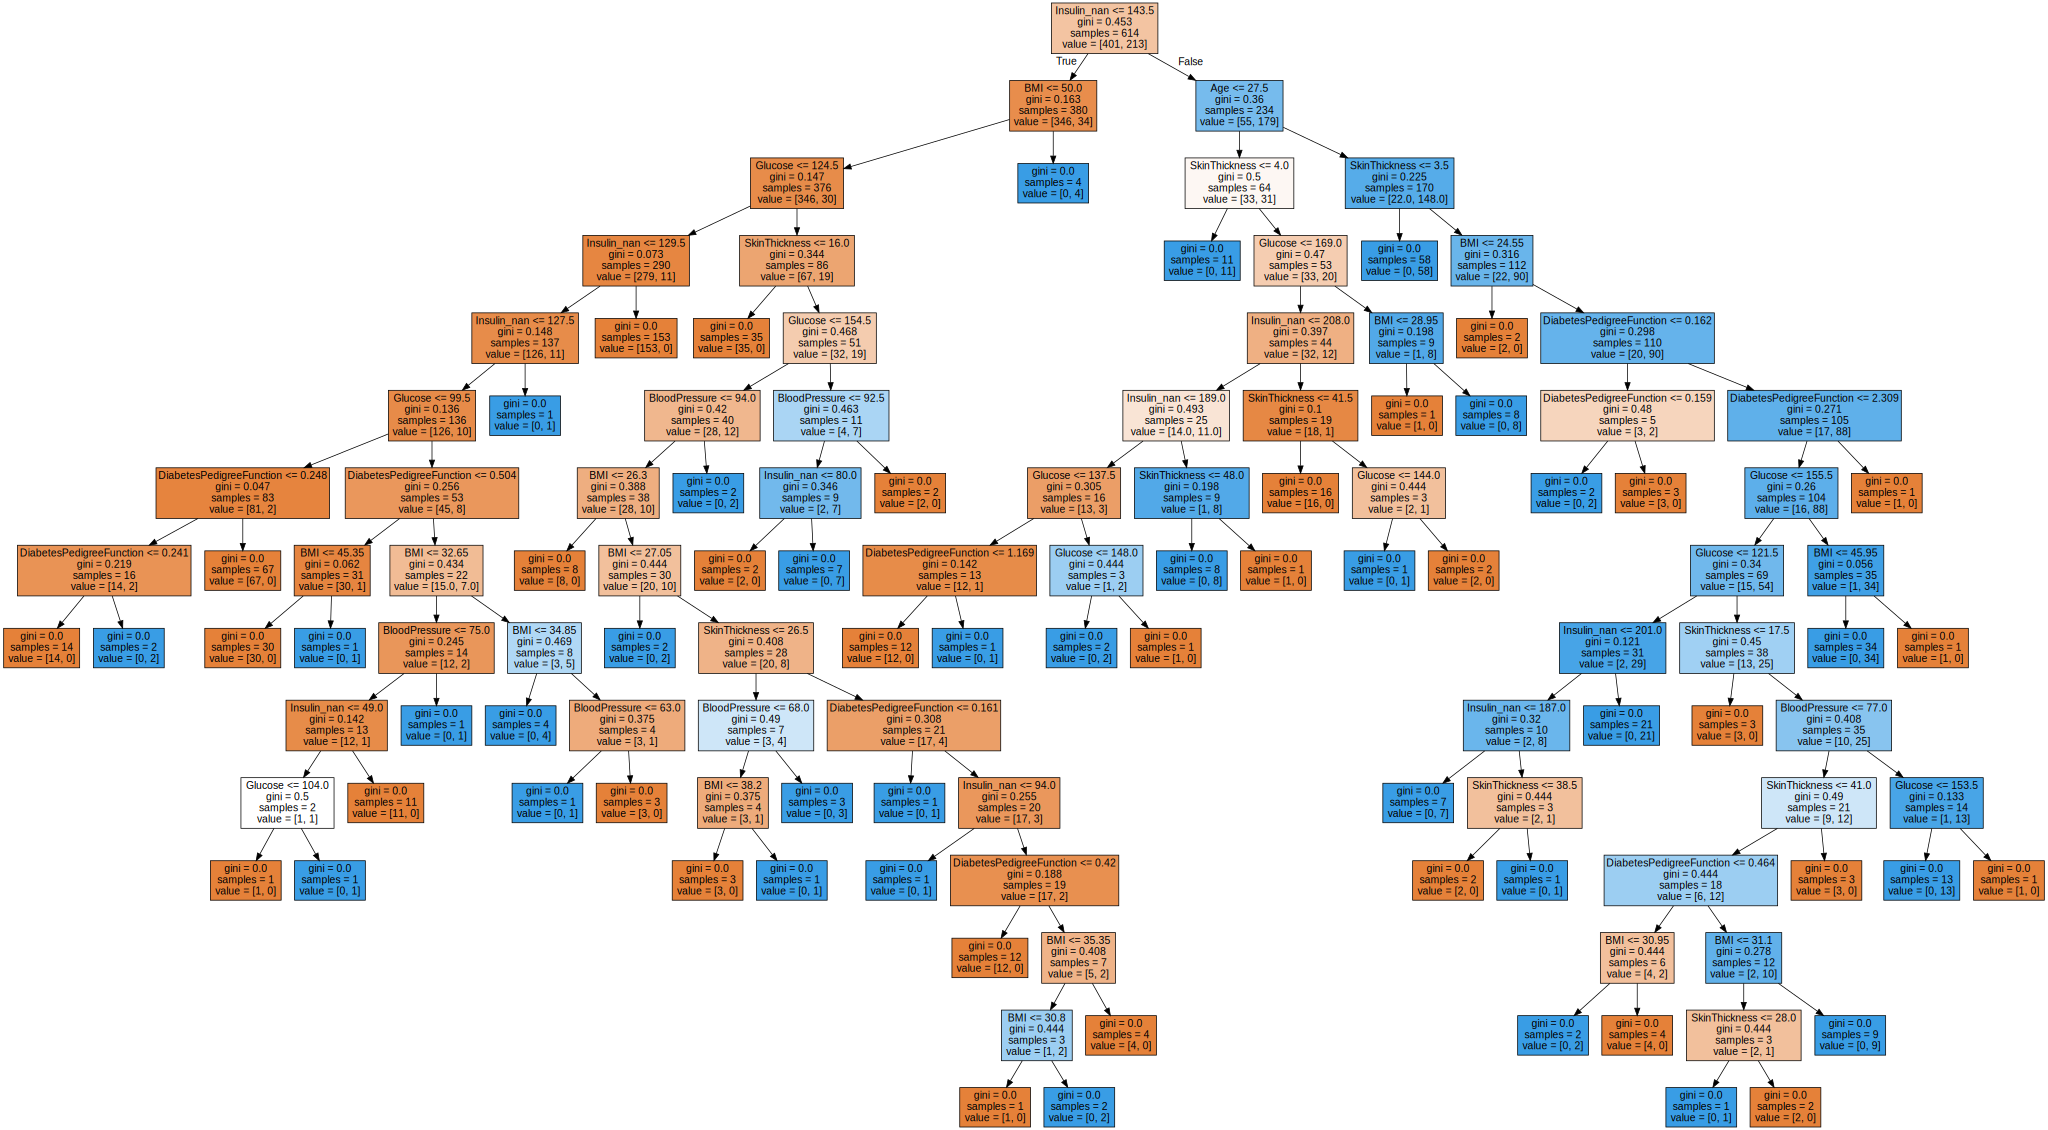

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names = feature_names,
filled=True)
graphviz.Source(dot_tree)

In [ ]:
model.feature_importances_

array([0.08847459, 0.04024467, 0.09851354, 0.11479469, 0.06326717,
       0.04985535, 0.54485   ])

<Axes: >

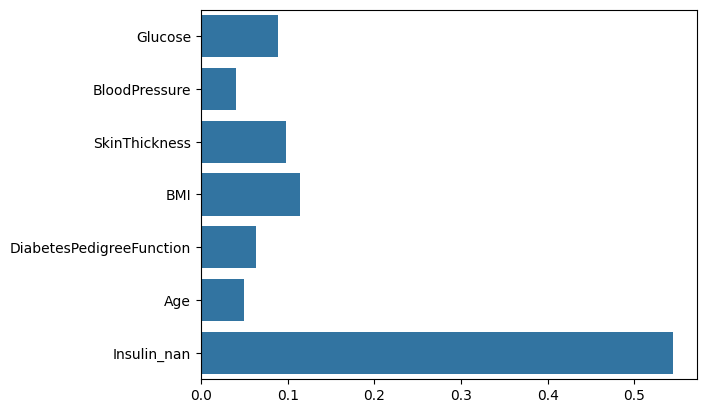

In [ ]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [ ]:
diff_count = abs(y_test - y_predict).sum()
diff_count

np.int64(24)

In [ ]:
y_test == y_predict

,Outcome
614,True
615,True
616,True
617,True
618,True
...,...
763,False
764,True
765,True
766,True


In [ ]:
abs(y_test - y_predict).sum() / len(y_test)

np.float64(0.15584415584415584)

In [ ]:
(len(y_test) - diff_count) / len(y_test) * 100

np.float64(84.4155844155844)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8441558441558441

In [ ]:
model.score(X_test, y_test) * 100

84.4155844155844